# Feature scalling (Multi-variable)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import *

### Training set

In [2]:

x_train,y_train = load_data("./data/houses.txt")
x_features = ['size(sqft)','bedrooms','floors','age']
print(f" numrows : {x_train.shape[0]}")
print(f" numcols : {x_train.shape[1]}")

 numrows : 99
 numcols : 4


### Visualizing data

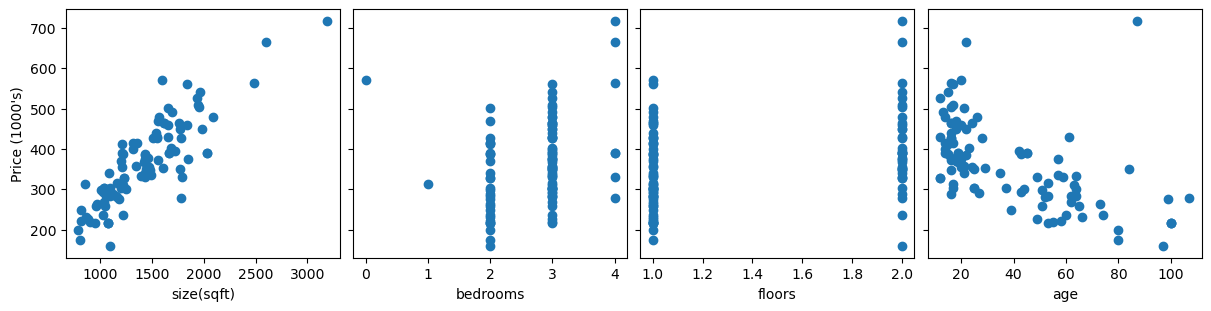

In [3]:
fig, axe = plt.subplots(1,4,constrained_layout=True, figsize=(12,3),sharey=True)
for i in range(len(axe)):
    axe[i].scatter(x_train[:,i],y_train)
    axe[i].set_xlabel(x_features[i])
axe[0].set_ylabel("Price (1000's)")
plt.show()

## Gradient descent without feature scalling

In [4]:
w_i = np.zeros(x_train.shape[1])
b_i = 0
w,b,J_history = run_gd(x_train,y_train,w_i,b_i,10,1e-7,1)

w,b found by gradient descent: w: [2.31283016e-01 4.17834784e-04 2.12498494e-04 4.80830049e-03], b: 0.00


### Plotting

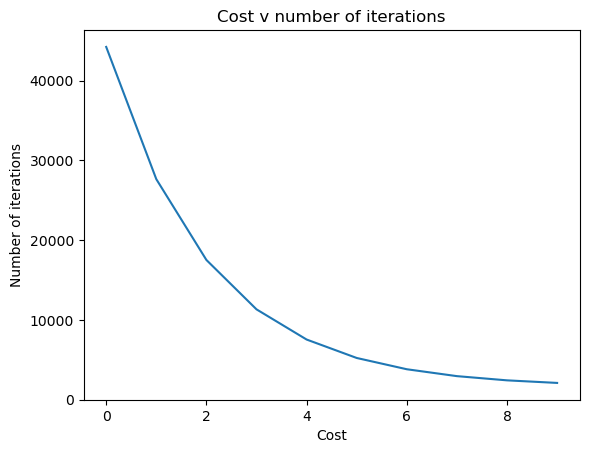

In [5]:
plt.plot(J_history)
plt.xlabel('Cost')
plt.ylabel('Number of iterations')
plt.title('Cost v number of iterations')
plt.show()

## Gradient descent with feature scalling

### z-score normalization 
**z-score normalization formula:**
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
**µ𝑗** is the mean and **𝜎𝑗** is the standard deviation
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}

### Calculating stdev

In [6]:
def comp_stdev(x):
    mu = comp_mean(x)
    m = x.shape[0]
    n = x.shape[1]
    sigma = np.zeros(n)
    for j in range(n):
        for i in range(m):
             sigma[j] += pow(x[i][j]-mu[j],2)/m
    return np.sqrt(sigma)  

### Calculating the mean

In [7]:
def comp_mean(x):
    m = x.shape[0]
    n = x.shape[1]
    mu = np.zeros(n)
    for j in range(n):
        for i in range(m):
            mu[j] += x[i][j]/m
    return mu        
        
        

### Implementing z_score normalization

In [8]:
#takes all your input features and normalize them
def zscore_norm(x):
    m = x.shape[0]
    n = x.shape[1]
    x_mu = comp_mean(x)
    x_sigma = comp_stdev(x)
    for i in range(m):
        for j in range(n):
            x[i][j] -= x_mu[j]
            x[i][j] /= x_sigma[j]
    return x,x_mu,x_sigma      

### Runing gradient descent with feature scalling

In [12]:
x_norm,x_mu,x_sigma = zscore_norm(x_train)
print(f"mu = {x_mu}, sigma = {x_sigma}")
w_norm,b_norm,J_history = run_gd(x_norm,y_train,w_i,b_i,1000,1.0e-1,100)

mu = [ 9.92261828e-16  1.55951640e-15 -3.12250226e-17  3.93782229e-16], sigma = [1. 1. 1. 1.]
w,b found by gradient descent: w: [110.56039756 -21.26715096 -32.70718139 -37.97015909], b: 363.16


### Target vs predictions


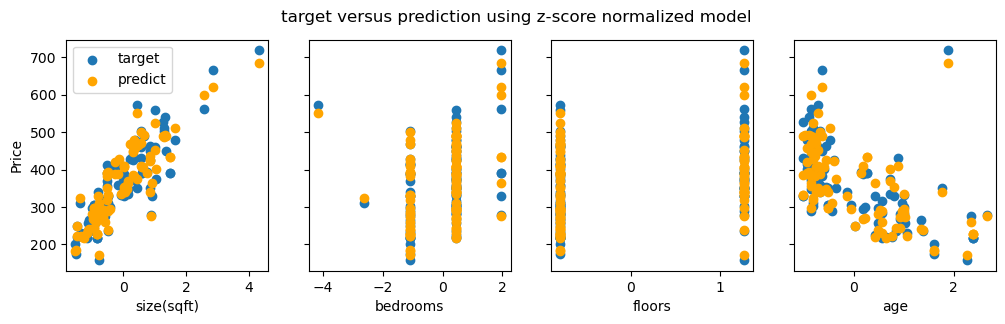

In [16]:
m = x_norm.shape[0]
yp = compute_fwb(x_norm,w_norm,b_norm)

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()